In [ ]:
#ASSIGNMENT 1

In [ ]:
#Uploading file
from google.colab import files
uploaded=files.upload()

Saving phishing_site_urls.csv to phishing_site_urls.csv


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

df=pd.read_csv("phishing_site_urls.csv")

#Filling missing values
df['Label']=df['Label'].fillna("Phishing")
df['URL']=df['URL'].fillna("Unknown")

#Adding categories
df['Label'] = df['Label'].map({'Phishing': 1, 'Legitimate': 0})
df['url_length'] = df['URL'].apply(lambda x:len(str(x)))
df['has_https']=df['URL'].apply(lambda x: 1 if 'https' in str(x) else 0)

#Training model
X = df[['url_length', 'has_https']]
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#Fitting model
model1 = LogisticRegression()
model1.fit(X_train, y_train)
model2 = RandomForestClassifier(random_state=42)
model2.fit(X_train, y_train)

#Evaluating performance
model1_metrics = classification_report(y_test, model1.predict(X_test), output_dict=True)['1']
model2_metrics = classification_report(y_test, model2.predict(X_test), output_dict=True)['1']

In [ ]:
#ASSIGNMENT 2

In [27]:
from sklearn.metrics import confusion_matrix

# Comparison
print(f"{'Metric':<10} {'LogisticReg':<12} {'RandomForest'}")
for metric in ['precision', 'recall', 'f1-score']:
    print(f"{metric:<10} {model1_metrics[metric]:<12.2f} {model2_metrics[metric]:.2f}")

# Confusion Matrices
print("\nLogistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, model1.predict(X_test)))

print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, model2.predict(X_test)))


Metric     LogisticReg  RandomForest
precision  1.00         1.00
recall     1.00         0.67
f1-score   1.00         0.80

Logistic Regression Confusion Matrix:
[[1 0]
 [0 3]]

Random Forest Confusion Matrix:
[[1 0]
 [1 2]]


In [ ]:
#DATA VISUALIZATION

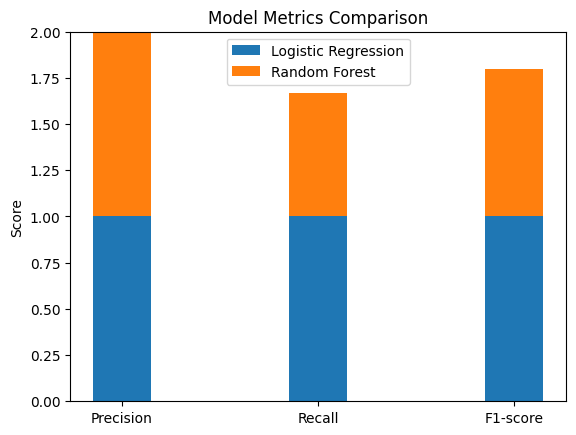

In [28]:
import matplotlib.pyplot as plt

metrics = ['Precision', 'Recall', 'F1-score']
lr = [model1_metrics['precision'], model1_metrics['recall'], model1_metrics['f1-score']]
rf = [model2_metrics['precision'], model2_metrics['recall'], model2_metrics['f1-score']]

plt.bar(metrics, lr, width=0.3, label='Logistic Regression')
plt.bar(metrics, rf, width=0.3, bottom=lr, label='Random Forest')

plt.ylabel("Score")
plt.ylim(0, 2)
plt.title("Model Metrics Comparison")
plt.legend()
plt.show()
